# Feature Matching

In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

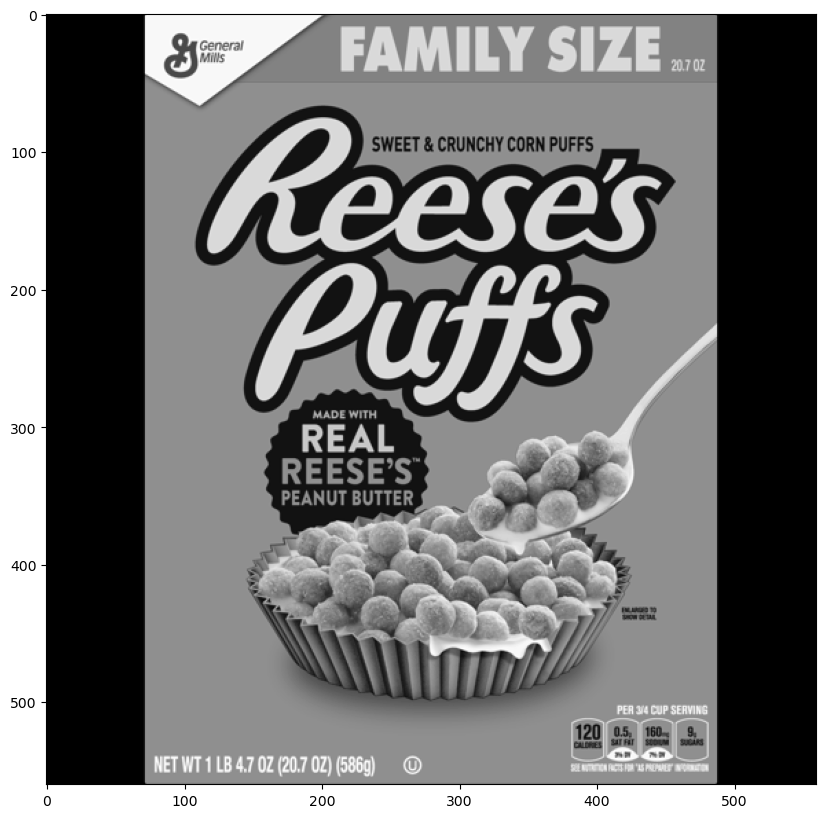

In [151]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)
display(reeses)

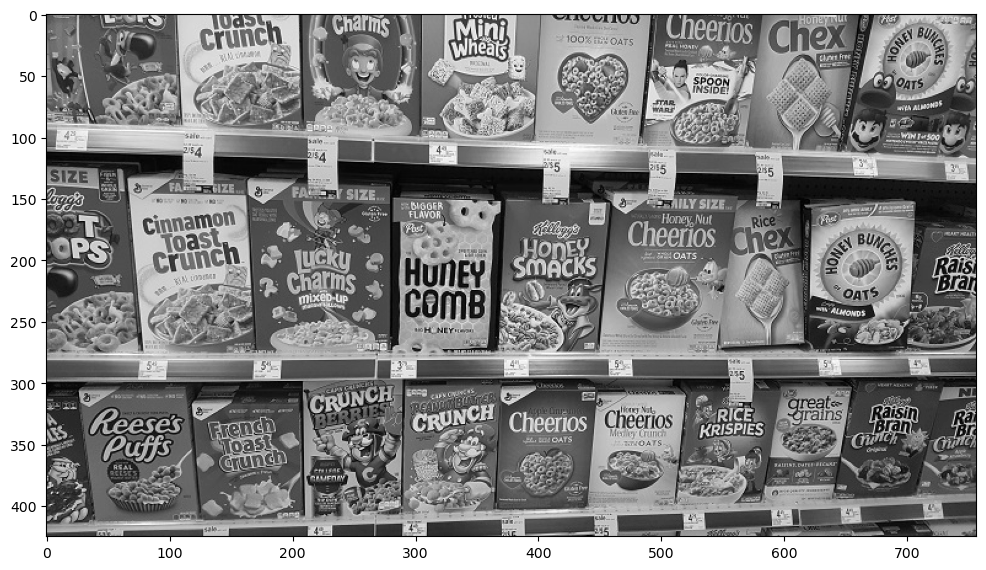

In [152]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cereals)

## Brute Force Detection with ORB

In [153]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
# matches

In [154]:
matches = sorted(matches, key=lambda x: x.distance)

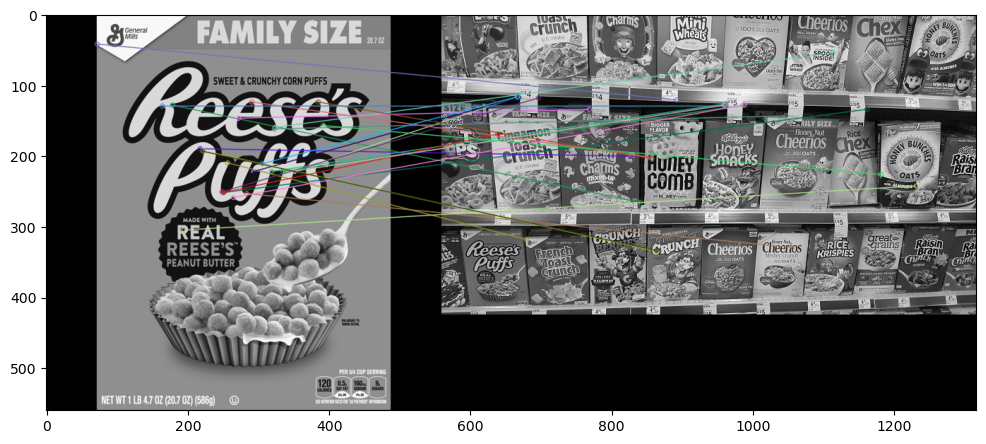

In [155]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)
display(reeses_matches)

## SIFT Descriptors
Better for detecting objects of different sizes

In [156]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# matches

Apply a Ratio Test to see which match is good by comaring two descriptors

In [157]:
good = []

# RATIO TEST
for match1, match2 in matches:
    # If the first match is less than 75% of the second match, then descriptor is good
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [158]:
# good

In [159]:
# len(good)
# len(matches)

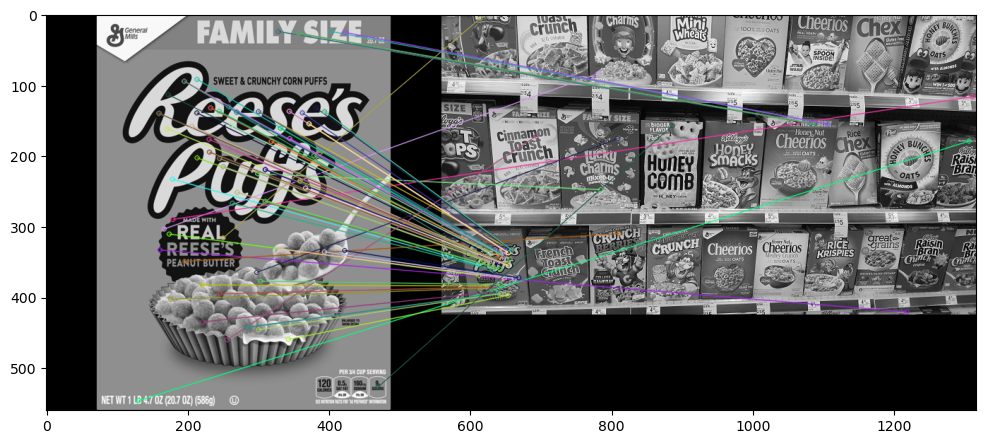

In [160]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2) 
display(sift_matches)

## FLANN Based Matcher
- Faster than sift
- To find approximate nearest neighbours 

In [161]:
sift = cv2.xfeatures2d.SIFT_create()

In [162]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [163]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=100)

In [164]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [165]:
matches = flann.knnMatch(des1, des2, k=2)

In [166]:
matchesMask = [[0,0] for i in range(len(matches))]

In [167]:
# RATIO TEST
for i, (match1, match2) in enumerate(matches):
    # If the first match is less than 75% of the second match, then descriptor is good
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1,0]

In [168]:
draw_params = dict(matchColor=(0,255,0), singlePointColor=(255,0,0), matchesMask=matchesMask, flags=0)
# draw_params = dict(matchColor=(0,255,0), singlePointColor=(255,0,0), matchesMask=matchesMask, flags=2)

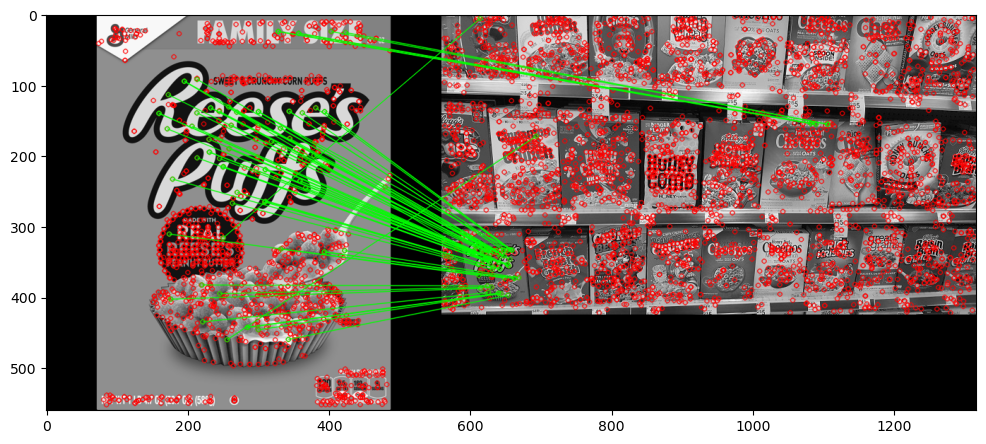

In [169]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)